#

# UFO Sighting Analysis

A small test notebook to look at the time series and geospatial distriution of UFO sightings as recorded in this __[kaggle dataset](https://www.kaggle.com/datasets/jonwright13/ufo-sightings-around-the-world-better)__.

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import folium
from folium import plugins
import matplotlib.pyplot as plt
import os, sys
import sklearn as sk
import sweetviz as sv
import dtale
import geopandas 
from ydata_profiling import ProfileReport
sns.set()

Create a dataframe of the data file and check both the header for an example of the data structure and check how much of the 
data is null

In [22]:
df = pd.read_csv(os.getcwd()+"/ufo-sightings-transformed.csv").drop(columns=["Unnamed: 0"])
df.head(10)
df.isnull().sum()

Date_time                         0
date_documented                   0
Year                              0
Month                             0
Hour                              0
Season                            0
Country_Code                    259
Country                         259
Region                          566
Locale                          457
latitude                          0
longitude                         0
UFO_shape                      1930
length_of_encounter_seconds       0
Encounter_Duration                0
Description                      15
dtype: int64

In [23]:
df.describe()

,Year,Month,Hour,latitude,longitude,length_of_encounter_seconds
count,80328.000000,80328.000000,80328.000000,80328.000000,80328.000000,8.032800e+04
mean,2003.850463,6.835026,15.525172,38.124963,-86.772015,9.017336e+03
std,10.426547,3.234876,7.753750,10.469146,39.697805,6.202322e+05
min,1906.000000,1.000000,0.000000,-82.862752,-176.658056,1.000000e-03
25%,2001.000000,4.000000,10.000000,34.134722,-112.073333,3.000000e+01
50%,2006.000000,7.000000,19.000000,39.412500,-87.903611,1.800000e+02
75%,2011.000000,9.000000,21.000000,42.788333,-78.755000,6.000000e+02
max,2014.000000,12.000000,23.000000,72.700000,178.441900,9.783600e+07


In [24]:
geometry = geopandas.points_from_xy(df.longitude, df.latitude)
geo_df = geopandas.GeoDataFrame(
    df[["Year", "Month", "Season", "Country", "Region", "UFO_shape", "latitude", "longitude"]], geometry=geometry
)

In [25]:
geo_df.head()

,Year,Month,Season,Country,Region,UFO_shape,latitude,longitude,geometry
0,1949,10,Autumn,United States,Texas,Cylinder,29.883056,-97.941111,POINT (-97.94111 29.88306)
1,1949,10,Autumn,United States,Texas,Light,29.384210,-98.581082,POINT (-98.58108 29.38421)
2,1955,10,Autumn,United Kingdom,England,Circle,53.200000,-2.916667,POINT (-2.91667 53.20000)
3,1956,10,Autumn,United States,Texas,Circle,28.978333,-96.645833,POINT (-96.64583 28.97833)
4,1960,10,Autumn,United States,Hawaii,Light,21.418056,-157.803611,POINT (-157.80361 21.41806)


In [27]:
map = folium.Map(location=[13.406, 80.110], tiles="CartoDB Positron", zoom_start=9)
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

heat_data
plugins.HeatMap(heat_data).add_to(map)



/var/folders/sn/qjsjgpk91pj6nf0yhq__zgkh0000gn/T/ipykernel_22935/2213697360.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

/var/folders/sn/qjsjgpk91pj6nf0yhq__zgkh0000gn/T/ipykernel_22935/2213697360.py:5: FutureWarning:

'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)



<Axes: >

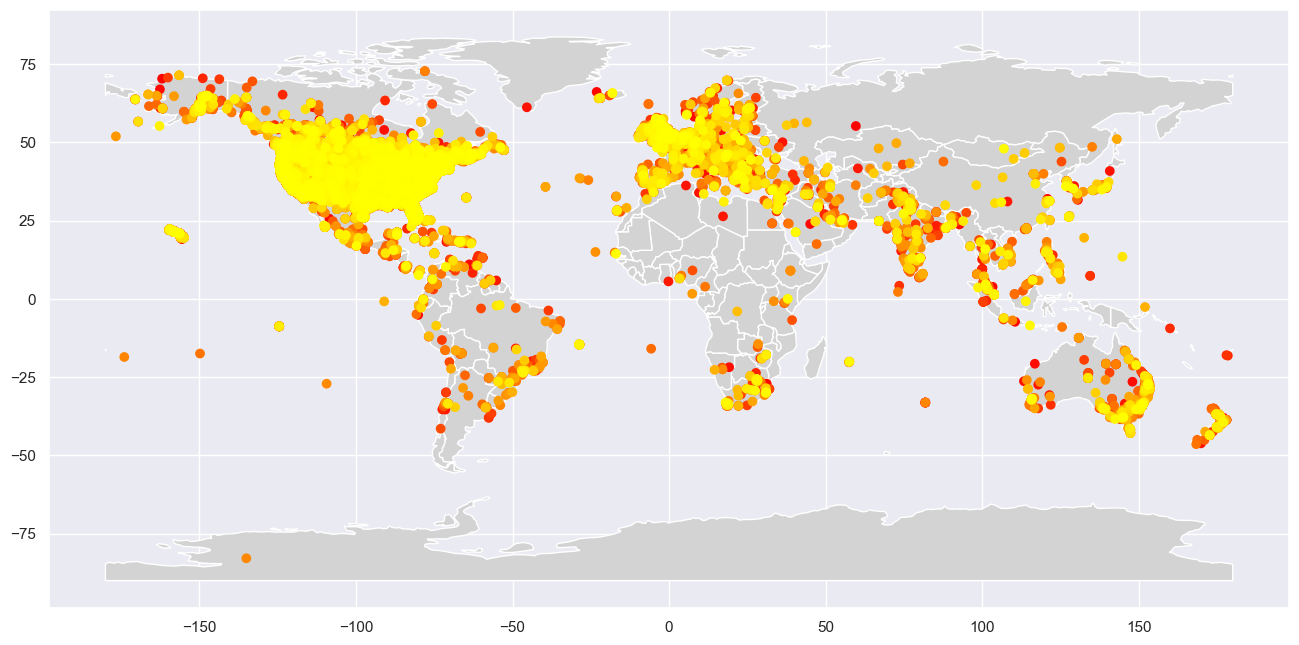

In [31]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(16, 10))
world.plot(color="lightgrey", ax=ax)
geo_df.plot(ax=ax, colormap="autumn")
